### Notebooks imports and packages

In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy as np 

%matplotlib inline

# Example 1 - Simple cost function

$f(x) = x^2+x+1$

In [2]:
def f(x):
    return x**2+x+1

In [3]:
#make data
x_1 = np.linspace(start = -3, stop = 3, num= 100)

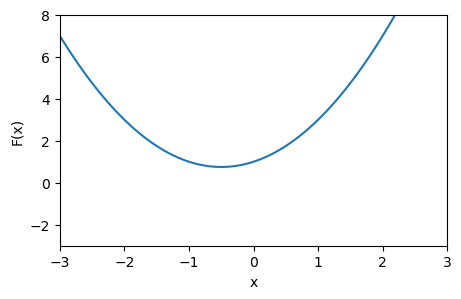

In [4]:
#plot
plt.figure(figsize=(5,3))
plt.plot(x_1,f(x_1))

plt.show
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(-3,8)
plt.style.use('bmh')

# Slopes & Derivatives

$f(x)=2*x + 1 $


In [5]:
def df(x):
    return 2*x+1

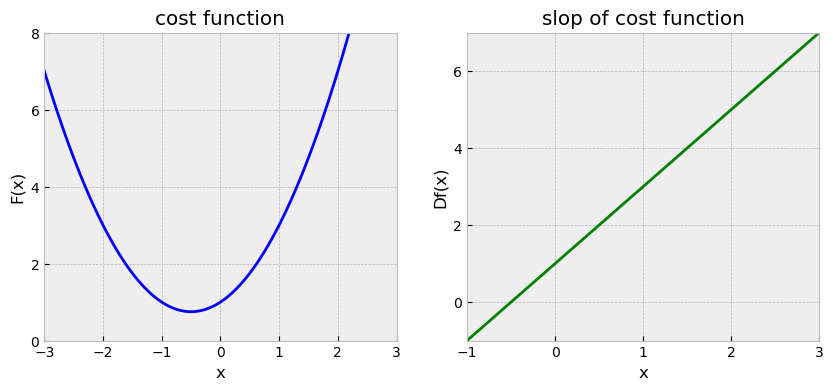

In [6]:
#ploting subplots
#plot 1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1), color = 'blue',linewidth = 2)
plt.show
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('bmh')

#plot 2
plt.subplot(1,2,2)
plt.plot(x_1,df(x_1), color = 'green')
plt.show
plt.title('slop of cost function')
plt.xlim(-1,3)
plt.ylim(-1,7)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


## Gradient descent

In [7]:
new_x = 3
previous_x = 0
alpha = 0.1
presicion = 0.00000000000000001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - alpha * gradient

    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < presicion:
        print('number of loops', i)
        break


print('the local minimum occurs at', new_x)
print('the value of slope or df(x) at this point is', df(new_x))
print('the cost or f(X) value at this point is',f(new_x))
type(slope_list)


number of loops 169
the local minimum occurs at -0.4999999999999999
the value of slope or df(x) at this point is 2.220446049250313e-16
the cost or f(X) value at this point is 0.75


list

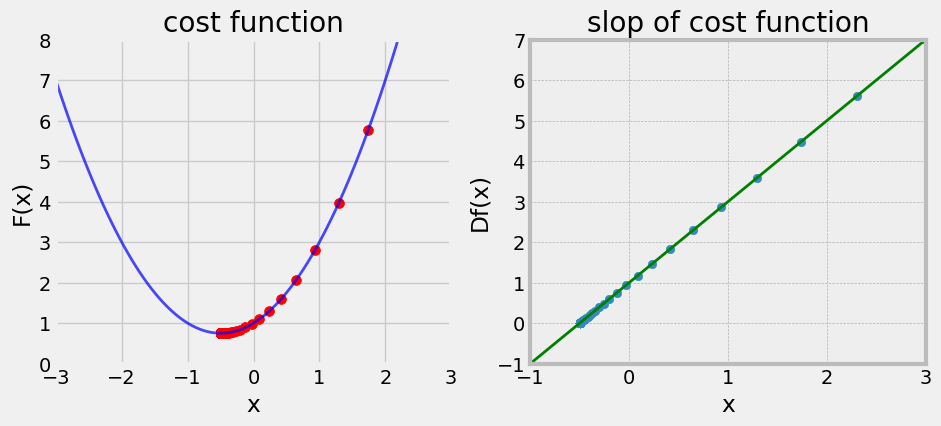

In [8]:
#ploting gradient descent 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1), color = 'blue',linewidth = 2, alpha = 0.7)
values = np.array(x_list)
plt.scatter(x_list,f(values), color ='red',s = 50)
plt.show
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_1,df(x_1), color = 'green')
plt.scatter(x_list,slope_list,)
plt.show
plt.title('slop of cost function')
plt.xlim(-1,3)
plt.ylim(-1,7)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


In [9]:
def sing(num_bottles):
    #TODO: Add your code to achieve the desired output and pass the challenge. 
    #NOTE: The f String method of String Interpolation does not work. 
    lyrics = []
    for num in range(num_bottles,0,-1):
        lyrics.append('{num} bottles of beer on the wall, {num} bottles of beer.'.format(num = num))
        lyrics.append('Take one down and pass it around, {num} bottles of beer on the wall.'.format(num = num - 1))
        lyrics.append('')
        
    return lyrics

In [10]:
print(sing(5))

['5 bottles of beer on the wall, 5 bottles of beer.', 'Take one down and pass it around, 4 bottles of beer on the wall.', '', '4 bottles of beer on the wall, 4 bottles of beer.', 'Take one down and pass it around, 3 bottles of beer on the wall.', '', '3 bottles of beer on the wall, 3 bottles of beer.', 'Take one down and pass it around, 2 bottles of beer on the wall.', '', '2 bottles of beer on the wall, 2 bottles of beer.', 'Take one down and pass it around, 1 bottles of beer on the wall.', '', '1 bottles of beer on the wall, 1 bottles of beer.', 'Take one down and pass it around, 0 bottles of beer on the wall.', '']


# Example -2: Multiple Minima vs Initial Guess & Advanced Functions
$$ g(x) = x^4-4x^2+5$$

In [11]:
x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4-4*x**2+5
def dg(x):
    return 4*x**3-8*x

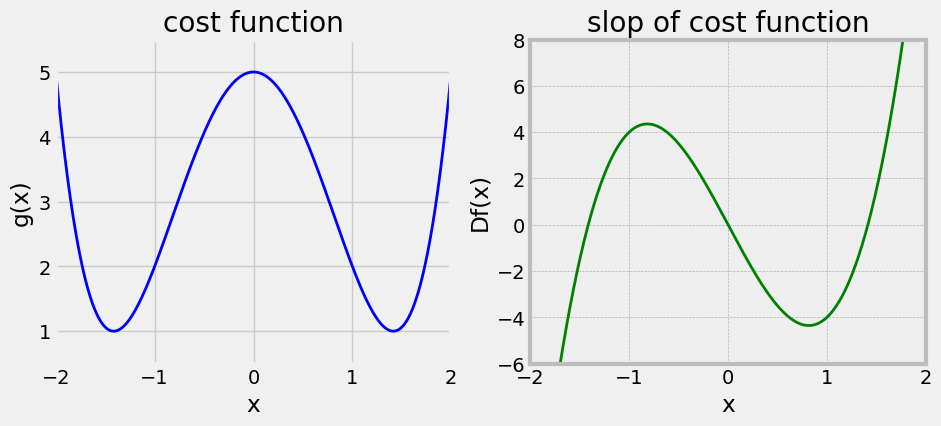

In [12]:
#ploting subplots
#plot 1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2), color = 'blue',linewidth = 2)
plt.show
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.style.use('bmh')

#plot 2
plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2), color = 'green')
plt.show
plt.title('slop of cost function')
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


## Gradient descent as a python function

In [13]:
def gradient_descent(derivative_func,initial_guess, multiplier=0.02, precision=0.0001):
    new_x = initial_guess
    previous_x = 0
    

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for i in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < presicion:
           
            break
    
    return new_x,x_list,slope_list


In [14]:
local_min,list_x,deriv_list = gradient_descent(dg, 0.5)
print("local min occurs at", local_min)
print("number of steps", len(list_x))


local min occurs at 1.4142135623730947
number of steps 100


In [15]:
local_min,list_x,deriv_list = gradient_descent(dg, -0.1)
print("local min occurs at", local_min)
print("number of steps", len(list_x))

local min occurs at -1.4142135623730947
number of steps 111


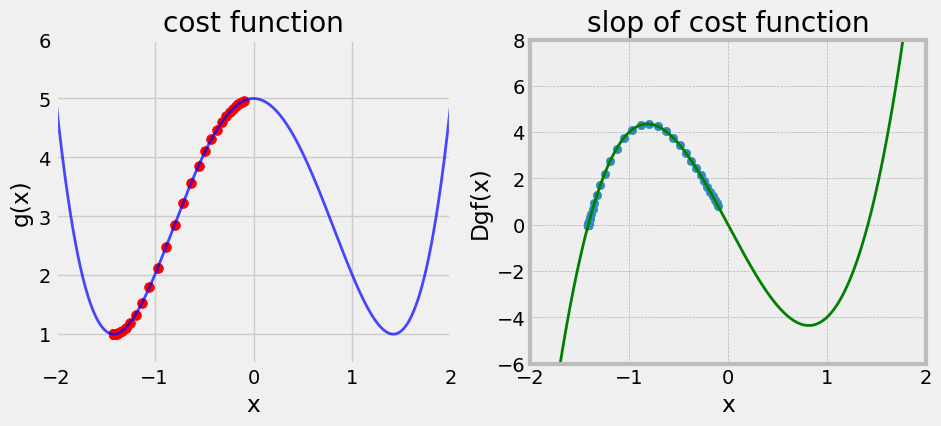

In [16]:
#ploting gradient descent 
local_min,list_x,deriv_list = gradient_descent(dg, -0.1)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2), color = 'blue',linewidth = 2, alpha = 0.7)

plt.scatter(list_x,g(np.array(list_x)), color ='red',s = 50)

plt.title('cost function')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(-2,2)
plt.ylim(0.5,6)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2), color = 'green')
plt.scatter(list_x,deriv_list)

plt.title('slop of cost function')
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('x')
plt.ylabel('Dgf(x)')
plt.style.use('fivethirtyeight')

